<a href="https://colab.research.google.com/github/gr-uzun/urban-sounds/blob/main/Urban_Sounds_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model Hazırlanması ve Eğitimi - Notebook**

a. Bir CNN modeli hazırlayın.

b. Modeli hazırlamış olduğunuz veriyi kullanarak eğitin.

c. Modelin performans metriklerini, loss ve accuracy grafiklerini ekrana yazdırın.

d. Aldığınız sonuçlara göre hyperparameter optimization yapın.

**Building a Convolutional Neural Network**

Image classification
In this project, we will build a convolutional neural network to solve a multiclass image classification problem.

**Importing the required libraries**

In [1]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy ,Pandas and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Dataset**

Bir önceki kısımda oluşturulan veri setlerini oku.

In [2]:
df_X_train = pd.read_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_X_train.csv')
df_X_val = pd.read_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_X_val.csv')
df_X_test = pd.read_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_X_test.csv')

In [3]:
df_y_train = pd.read_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_y_train.csv')
df_y_val = pd.read_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_y_val.csv')
df_y_test = pd.read_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_y_test.csv')

In [4]:
df_X_train

,Image
0,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
1,[[ 7 8 9 11 16 8 12 10 20 7 24 ...
2,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
3,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
4,[[ 0 0 3 0 0 0 0 0 0 0 0 ...
...,...
6980,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
6981,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
6982,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
6983,[[ 0 0 0 0 0 0 0 0 0 0 0 ...


In [5]:
df_y_train

,ClassId
0,2
1,7
2,9
3,1
4,7
...,...
6980,0
6981,8
6982,2
6983,5


**Constructing the neural network**

That was it for the preprocessing of the data!

Now we can create our model. First, we start by creating a model object using the Sequential API of Keras.

📌 Use tf.keras.Sequential() to create a model object

In [6]:
image_width = 25
image_height = 25

In [7]:
X_train = df_X_train.to_numpy()
X_val = df_X_val.to_numpy()
X_test = df_X_test.to_numpy()

In [8]:
y_train = df_y_train.to_numpy()
y_val = df_y_val.to_numpy()
y_test = df_y_test.to_numpy()

In [9]:
y_train

array([[2],
       [7],
       [9],
       ...,
       [2],
       [5],
       [0]])

In [10]:
print(f'X_train.shape :{X_train.shape}')
print(f'X_train.ndim :{X_train.ndim}')
print(f'X_train.size :{X_train.size}')

X_train.shape :(6985, 1)
X_train.ndim :2
X_train.size :6985


In [11]:
print(f'y_train.shape :{y_train.shape}')
print(f'y_train.ndim :{y_train.ndim}')
print(f'y_train.size :{y_train.size}')

y_train.shape :(6985, 1)
y_train.ndim :2
y_train.size :6985


Numpy içindeki str ifadeyi array e dönüştür.

In [12]:
def str_to_numpy_array(arr) :
  for i in range(arr.size):
    a = np.fromstring((arr[i][0]).replace('[', ' ').replace(']', ' '), dtype=int, sep=' ')
    
    b = a.reshape(image_width,image_height)

    arr[i][0] = b

  return arr

In [13]:
X_train = str_to_numpy_array(X_train)
X_val = str_to_numpy_array(X_val)
X_test = str_to_numpy_array(X_test)

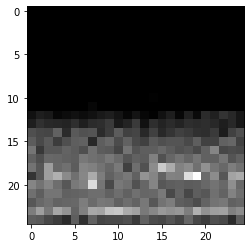

In [14]:
#displaying the normalized image as the output on the screen
plt.imshow(X_train[500][0], cmap="gray")

In [15]:
X_train = X_train/255
X_val = X_val/255
X_test = X_val/255

In [ ]:
X_train[:1]

array([[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0,   2,  20,   0,   0,  

In [16]:
print(f'X_train.shape :{X_train.shape}')
print(f'X_train.ndim :{X_train.ndim}')
print(f'X_train.size :{X_train.size}')

X_train.shape :(6985, 1)
X_train.ndim :2
X_train.size :6985


In [17]:
# Create a model object
model = tf.keras.Sequential()

In [18]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size = (3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(image_width,image_height,1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [19]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(image_width,image_height,1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(image_width,image_height,1)))

**Flatten**

To connect the 2D convolution and 1D dense layers, we have to "flatten" the convolution layer.

In [20]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

**Classification layers**

Now that we have the features extracted, we can move on to the classification part. We add two dense layers each with 64 nodes, 0.5 dropout and ReLU activation functions.

In [21]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

**Output layer**

As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 10 in our case. We'll use the softmax activation function in the output layer.

In [22]:
# Add the output layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

**Optimizer**

Now we have the structure of our model.

To configure the model for training, we'll use the .compile() method.

Inside the compile method, we have to define the following:

"Adam" for optimizer
"Sparse Categorical Crossentropy" for the loss function

In [23]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Training the model**

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the validation_data parameter, we'll give the X_val and y_val as a tuple.

In [ ]:
print(f'X_train.shape :{X_train[:,0].shape}')
print(f'X_train.ndim :{X_train[:,0].ndim}')
print(f'X_train.size :{X_train[:,0].size}')

X_train.shape :(6985,)
X_train.ndim :1
X_train.size :6985


In [ ]:
print(f'y_train.shape :{y_train[:,0].shape}')
print(f'y_train.ndim :{y_train[:,0].ndim}')
print(f'y_train.size :{y_train[:,0].size}')

y_train.shape :(6985,)
y_train.ndim :1
y_train.size :6985


In [ ]:
y_train[:,0].astype(int)

array([2, 7, 9, ..., 2, 5, 0])

In [ ]:
X_train_1 = np.asarray(X_train[:,0])
X_val_1 = np.asarray(X_val[:,0])

In [29]:
x = np.asarray(X_val).astype('float32')

ValueError: ignored

In [28]:
tensor1 = tf.convert_to_tensor(X_val, dtype=float, name='tensor1')

ValueError: ignored

In [26]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train,
                    y_train,
                    batch_size = 128,
                    epochs=50,
                    validation_data=(X_val,y_val))

ValueError: ignored

**Visualize the results**

After the model is trained,

we can create a graph to visualize the change of loss over time.

Results are held in:

results.history["loss"]

results.history["val_loss"]

In [ ]:
# Plot the the training loss
plt.plot(results.history["loss"],label='loss')

# Plot the the validation loss
plt.plot(results.history["val_loss"],label='val_loss')

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Put legend table
plt.legend()


# Show the plot
plt.show()

Now do the same thing for accuracy.

In [ ]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"],label='accuracy')

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"],label='val_accuracy')

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

**Performance evaluation**

Let's use the test dataset we created to evaluate the performance of the model.

In [ ]:
model.evaluate(X_test,y_test)

**Try a prediction**

Next, we take the sample we selected at the beginning and make a prediction on it.

In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1,32,32,3))

# Print the prediction result
prediction_result

Finally, we find the predicted class and prediction probability and print the results.

In [ ]:
# Find the predicted class
predicted_class = prediction_result.argmax()

# Find the prediction probability
prediction_probability = prediction_result.max()

In [ ]:
# Print the results
print(f'This image belongs to class {predicted_class} with probability {prediction_probability} %')